#1)-Importing Libraries

In [217]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

#2)-Activation and loss functions

##2.1-Standard activation functions

In [218]:
# Sigmoid function
def sigmoid(x, derivate=False):
  if derivate:
    return np.exp(-x)/((np.exp(-x) + 1)**2)
  else:
    return 1/(1 + np.exp(-x))

# Step Function
def steep(x, derivate=False):
  return np.piecewise(x,[x<0.0,x>=0.0],[0,1])

# ReLu function
def ReLu(x, derivate=False):
  if derivate:
    x[x<=0] = 0
    x[x>0]=1
    return x
  else:
    return np.maximum(0,x)

# Tanh function
def Tanh(x, derivate=False):
  if derivate:
    return (1/np.tanh(x))**2
  else:
    return np.tanh(x)


In [219]:
# Mean Squared Error loss function
def mse(y,y_hat, derivate=False):
  if derivate:
    return (y_hat - y)
  else:
    return np.mean((y_hat-y)**2)

In [220]:
prediction = np.array([0.9,0.5,0.2,0.0])
real =  np.array([0,0,1,1])
mse(real, prediction)

0.675

##2.3-Visualization of activation functions

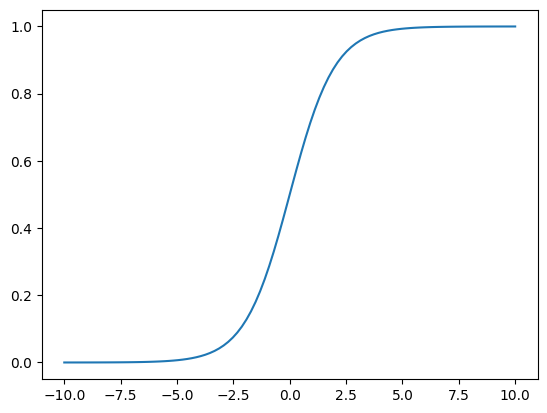

In [221]:
x = np.linspace(10,-10,100)
plt.plot(x,sigmoid(x))

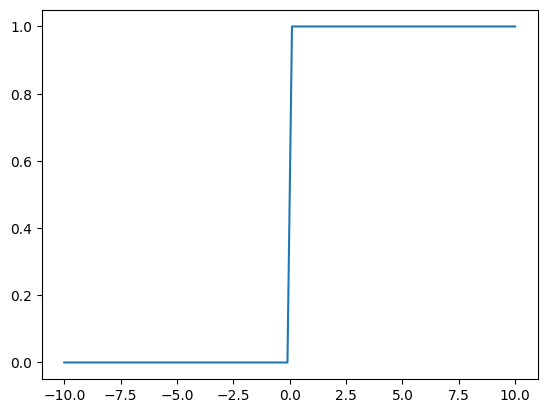

In [222]:
plt.plot(x,steep(x))

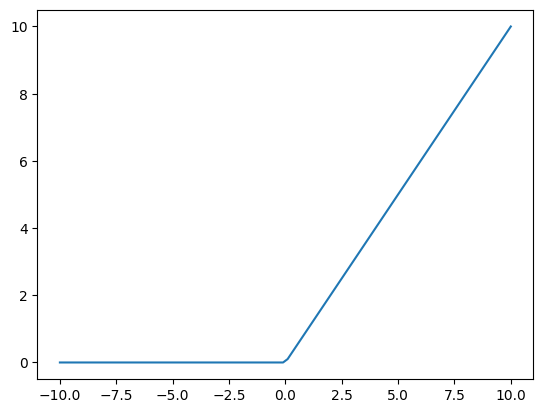

In [223]:
plt.plot(x,np.vectorize(ReLu)(x))

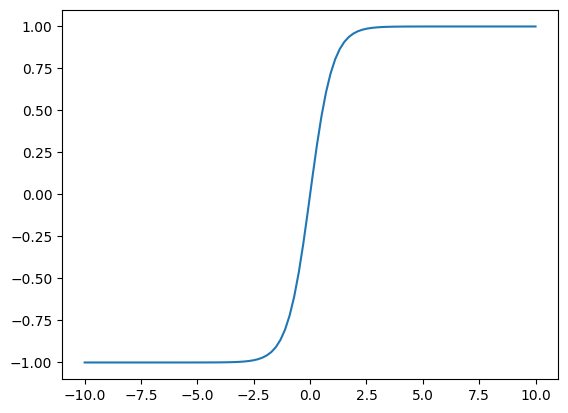

In [224]:
plt.plot(x,Tanh(x))

#3)-Data to be processed

We generate artificial data points according to de multivariate Guassian function where mean=None implies that we do not specify the mean for each cathegory, in fact, the mean is randomly generated. We generate then two random clusters to test our code for the FNN. On the other hand, we randomly shuffle the data to guarantee the data inter independence.

In [225]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                                             cov=0.1,
                                             n_samples = N,
                                             n_features = 2,
                                             n_classes = 2,
                                             shuffle = True,
                                             random_state=None)

X, Y = gaussian_quantiles

print(X.shape)
print(Y.shape)

(1000, 2)
(1000,)


We add an axis or dimension to the Y data.

In [226]:
Y = Y[:,np.newaxis]
Y[0]

array([1])

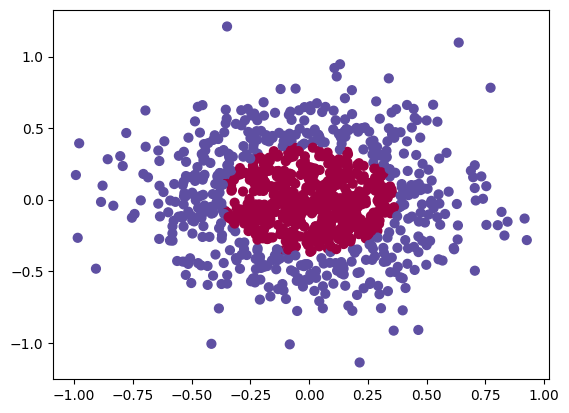

In [227]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)
plt.show()

#4)-FNN Architecture

##4.1-Parameter initialization

In [228]:
def initialize_parameters_deep(layers_dim):
  parameters = {}
  L = len(layers_dim)

  for l in range(0,L-1):
    parameters['W'+ str(l+1)] = (np.random.rand(layers_dim[l], layers_dim[l+1])*2)-1
    parameters['b'+ str(l+1)] = (np.random.rand(1, layers_dim[l+1])*2)-1
  
  return parameters


We specity the architecture of each layer, i.e., the amount of neurons per layers.

In [229]:
layer_dims = [2,4,8,1]
params = initialize_parameters_deep(layer_dims)
params

{'W1': array([[ 0.09370992,  0.76026305, -0.53151783,  0.10477672],
        [ 0.20256287,  0.22605501, -0.77246884,  0.75537075]]),
 'b1': array([[-0.78639242,  0.57790266, -0.99885559,  0.94549905]]),
 'W2': array([[ 0.175717  , -0.22358406,  0.22902218, -0.50843782, -0.42782737,
         -0.39052427,  0.16542024, -0.1350033 ],
        [-0.14086369,  0.80027286,  0.21549103,  0.62769013,  0.41585282,
          0.89133317,  0.73304898, -0.97812556],
        [ 0.69425031,  0.38218784,  0.00110514, -0.5204701 , -0.55372067,
          0.05548257, -0.61969188,  0.27839661],
        [ 0.1865049 ,  0.0017205 ,  0.19655112,  0.49613746,  0.59645937,
          0.2548509 , -0.94691617, -0.49654204]]),
 'b2': array([[ 0.34551402,  0.70738045, -0.10463685,  0.75205625, -0.21843889,
         -0.62327339, -0.24186651,  0.48777308]]),
 'W3': array([[-0.43886909],
        [-0.17278521],
        [-0.08273168],
        [-0.31059663],
        [-0.13176867],
        [ 0.82511125],
        [-0.8753503 ],


We check that the dimensions between tensor objects must be apropiate to execute the dot products.

In [230]:
print(params['W1'].shape)
print(X.shape)

(2, 4)
(1000, 2)


In [231]:
np.matmul(X,params['W1']).shape

(1000, 4)

In [232]:
(X@params['W1']).shape

(1000, 4)

##4.2-Feed Fordward and backpropagation training

If we have initialized the model parameters, we make the input values as one of the entries of the parameter tensor. Then we define the training protocole as a function that applies feed fordward training, backpropagation and gradient descend.

In [233]:
def train(X_data,lr,params,training=True):
## Forward

    params['A0'] = X_data # Input values/ input 'activations'
        
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = ReLu(params['Z1'])
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = ReLu(params['Z2'])
       
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])
  
    output = params['A3']
    
    if training:
    # Backpropagation
    
        params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
        
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * ReLu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * ReLu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        
        ## Gradinet Descent:
           
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
    return output

Next, we iterate the training procedure until convergence.

In [234]:
layer_dims = [2,4,8,1]
n_epocs = 60000
params = initialize_parameters_deep(layer_dims)
errors = []

for i in range(n_epocs):
  output = train (X,0.0001,params)
  if i % 30 == 0:
    print(mse(Y,output))
    errors.append(mse(Y,output))

0.3683704410641125
0.31806074993225536
0.2847311445565505
0.2659860894753608
0.2559960182114212
0.2506279955511499
0.24758331494572927
0.24568867025015967
0.24438250861508048
0.24338559308928615
0.2425839412929519
0.24190256376188632
0.24130101111492883
0.24076406402861233
0.24026210949143784
0.23978160897087034
0.23931078515188847
0.23886036578356026
0.23843075950371134
0.23801256356332592
0.2375980880763775
0.23717855601194848
0.23676508244663982
0.23635574115778865
0.2359492524671901
0.23554071370845645
0.2351313802552555
0.23471301513626383
0.2342907418319251
0.23386384383798112
0.23343125629494
0.2329853368591072
0.23252860448464244
0.23206803372174337
0.23159674210592568
0.23111777385513904
0.2306307898952267
0.23013350276134653
0.22962633852201517
0.22911284577311927
0.22859047165349244
0.22805890244120258
0.22751441967924474
0.2269571993164862
0.22638847203845858
0.2258095763433746
0.22522011740831746
0.22462077471954328
0.2240112950092218
0.2233883449353428
0.22275168574152393

We plot the error function to see graphically the model performance.

<function matplotlib.pyplot.show(close=None, block=None)>

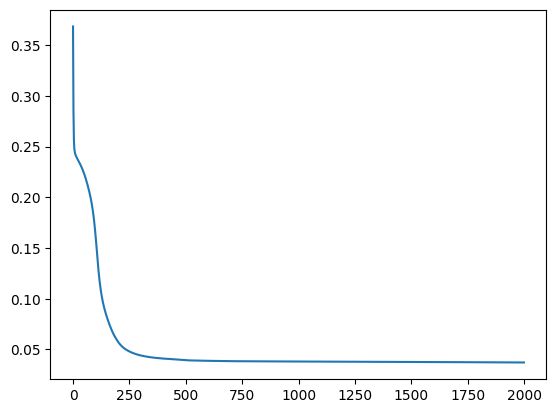

In [235]:
plt.plot(errors)
plt.show

##4.3-Model testing

In [236]:
data_test = (np.random.rand(1000,2)*2)-1
y = train(data_test,0.001,params,training=False)

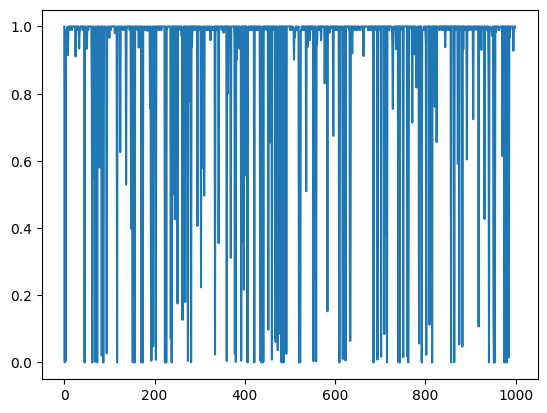

In [237]:
plt.plot(y)

In [238]:
y = np.where(y>= 0.7,1,0)

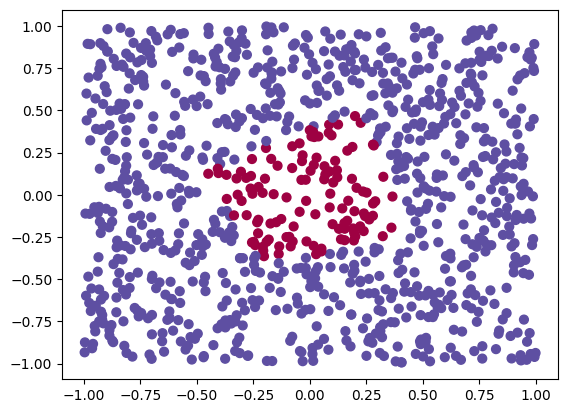

In [239]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0] ,s=40, cmap=plt.cm.Spectral);

#5)-Feed Forward Neural Network Class

In [196]:
class Neural_Net():
  # define the network atributes
  def __init__(self, layer_dim, n_epocs, l_rate, Train):
    self.layer_dim = layer_dim
    self.Train = Train
    self.n_epocs = n_epocs
    self.l_rate = l_rate
    self.L = len(layer_dim) 
    self.W_ten={}
    self.grads={}
    self.history=[] 
    
    self.input_size = layer_dim[0]
    self.hidden_size = layer_dim[1:-1]
    self.output_size = layer_dim[-1]

  # Activation functions
  #*-------------------------------------*
  def sigmoid(self, x, derivate=False):                                             
    if derivate:
      return np.exp(-x)/((np.exp(-x) + 1)**2)
    else:
      return 1/(1 + np.exp(-x))

  def steep(self, x, derivate=False):
    return np.piecewise(x,[x<0.0,x>=0.0],[0,1])

  def ReLu(self,x, derivate=False):
    if derivate:
      dx=np.copy(x)
      dx[x<=0] = 0
      dx[x>0]=1
      return dx
    else:
      return np.maximum(0,x)

  def Tanh(self, x, derivate=False):
    if derivate:
      return (1/np.tanh(x))**2
    else:
      return np.tanh(x)
  #*-------------------------------------*

  # Cost Functions
  #*-------------------------------------*
  def mse(self,y,y_hat, derivate=False):
    if derivate:
      return (y_hat - y)
    else:
      return np.mean((y_hat-y)**2)
  #*-------------------------------------*

  # Parameter initialization
  #*-------------------------------------*
  def initialize_params(self, layer_dim):
    self.W_ten = {}
    for l in range(0, self.L-1):
      self.W_ten['W' + str(l+1)] = ((np.random.rand(layer_dim[l], layer_dim[l+1]))*2)-1
      self.W_ten['b' + str(l+1)] = (np.random.rand(1, layer_dim[l+1])*2)-1 
    return self.W_ten

  # Fordard
  #*-------------------------------------*

  def forward_prop(self, X):
    A = X
    caches = []
    L = len(self.W_ten)//2 #number of layers
    
    # Implement forward propagation for all layers except the last
    for l in range(1,L):
      W = self.W_ten['W' + str(l)]
      b = self.W_ten['b' + str(l)]
      Z = np.dot(A, W) + b
      A = self.ReLu(Z, derivate=False)
      caches.append((Z, A))

    # Implement forward propagation for the last layer (output layer)
    WL = self.W_ten['W' + str(L)]
    bL = self.W_ten['b' + str(L)]
    ZL = np.dot(A, WL) + bL
    AL = self.sigmoid(ZL, derivate=False)
    caches.append((ZL, AL))

    return AL, caches

  # BackPropagation
  #*-------------------------------------*
  def backward_prop(self, AL, Y, caches):
    self.grads = {}
    L = len(caches)
    N = Y.shape[0]
    dAL = self.mse(Y, AL, derivate=True) # compute derivate of the error

    # gradients of the last layer
    current_cache = caches[L-1]
    ZL, AL_cur = current_cache
    AL_prev = caches[L-2][1]
    dZL = dAL * self.sigmoid(ZL, derivate=True)
    self.grads['dW' + str(L)] = np.dot(AL_prev.T, dZL) 
    self.grads['db' + str(L)] = np.sum(dZL, axis=0, keepdims=True) 
    

    # compute the gradients for the remaining layers
    for l in range(L - 2, -1, -1):
      dA = np.dot(dZL, self.W_ten['W' + str(l + 2)].T)
      dZ = dA * self.sigmoid(caches[l][0], derivate=True)    
      self.grads['dW' + str(l + 1)] = np.dot(caches[l - 1][1].T, dZ) / N
      self.grads['db' + str(l + 1)] = np.sum(dZ, axis=0, keepdims=True) / N     
      dZL = dZ
    return self.grads
  
  # Update parameters
  #*-------------------------------------*
  def update_W_ten(self, grads):
    L = len(self.W_ten) //2
    for l in range(1, L+1):
      self.W_ten['W' + str(l)] -=self.l_rate * grads['dW' + str(l)]
      self.W_ten['b' + str(l)] -=self.l_rate * grads['db' + str(l)]

  # Train the model
  #*-------------------------------------*
  def train(self, X, Y, Train):
    
    self.initialize_params(layer_dim=self.layer_dim)
    
    if Train:
      for epoch in range(self.n_epocs + 1):
        output, caches = self.forward_prop(X)

        mse_error = self.mse(Y, output)
        self.history.append(mse_error)

        grad = self.backward_prop(output, Y, caches)
        self.update_W_ten(grad)
      return self.forward_prop(X)
    else:
      output,_ = self.forward_prop(X)
      #return np.where(output >= 0.7,1,0)
      return output
  
  def plot_history(self):
    plt.plot(range(len(self.history)),self.history)
    plt.xlabel('Epoch')
    plt.ylabel('MSE Error')
    plt.title('MSE Error History')
    plt.show()


In [153]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                                             cov=0.1,
                                             n_samples = N,
                                             n_features = 2,
                                             n_classes = 2,
                                             shuffle = True,
                                             random_state=None)

X, Y = gaussian_quantiles
Y = Y[:,np.newaxis]

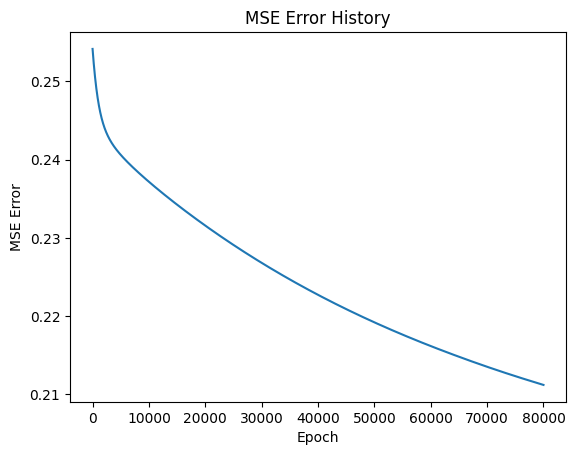

In [244]:
layer_dims = [2, 4, 8, 1]
n_epocs = 80000
l_rate = 0.0001 
neural_net = Neural_Net(layer_dim=layer_dims, n_epocs=n_epocs, 
                          l_rate=l_rate, Train=True)
y_out = neural_net.train(X, Y, Train=True)
neural_net.plot_history()

In [242]:
data_test = (np.random.rand(1000,2)*2)-1
y = neural_net.train(data_test, Y, Train=False)

In [213]:
y =np.where(y >= 0.5,1,0)

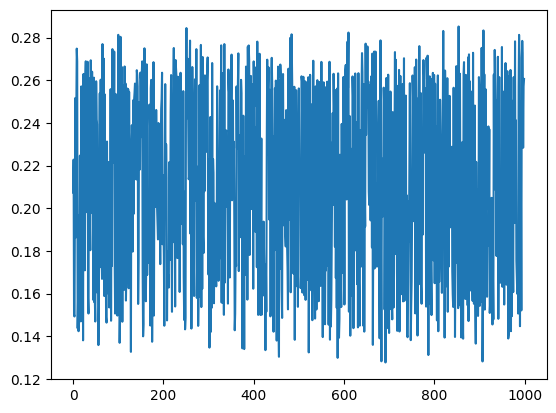

In [243]:
plt.plot(y)

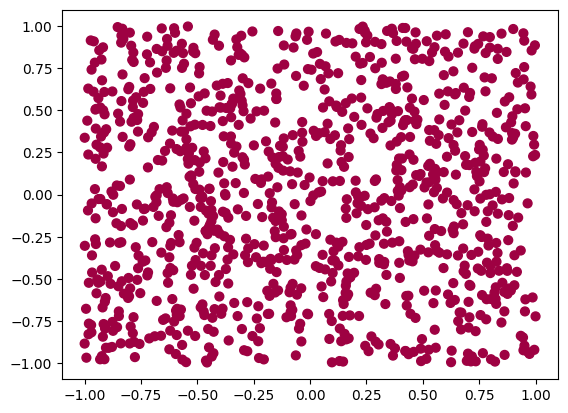

In [214]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0] ,s=40, cmap=plt.cm.Spectral)

In [ ]:
def Neural_Model(data, target, layer_dim, n_epocs, l_rate):
  neural_net = Neural_Net(layer_dim=layer_dim, n_epocs=n_epocs, 
                          l_rate=l_rate, Train=True)
  params=neural_net.train(data, target)
  return params

layer_dims = [2, 4, 8, 1]
n_epocs = 10
l_rate = 0.001                    
neural_net_model = Neural_Model(X,Y,layer_dims, n_epocs, l_rate)
neural_net_model